Epoch 1/30
189/189 - 0s - loss: 0.5714 - accuracy: 0.7725 - val_loss: 0.4452 - val_accuracy: 0.8524
Epoch 2/30
189/189 - 0s - loss: 0.3329 - accuracy: 0.9143 - val_loss: 0.3308 - val_accuracy: 0.8810
Epoch 3/30
189/189 - 0s - loss: 0.2716 - accuracy: 0.9265 - val_loss: 0.3010 - val_accuracy: 0.9095
Epoch 4/30
189/189 - 0s - loss: 0.2571 - accuracy: 0.9381 - val_loss: 0.2923 - val_accuracy: 0.9238
Epoch 5/30
189/189 - 0s - loss: 0.2505 - accuracy: 0.9402 - val_loss: 0.3032 - val_accuracy: 0.8857
Epoch 6/30
189/189 - 0s - loss: 0.2466 - accuracy: 0.9455 - val_loss: 0.2885 - val_accuracy: 0.9095
Epoch 7/30
189/189 - 0s - loss: 0.2434 - accuracy: 0.9407 - val_loss: 0.2830 - val_accuracy: 0.9238
Epoch 8/30
189/189 - 0s - loss: 0.2404 - accuracy: 0.9376 - val_loss: 0.2790 - val_accuracy: 0.9429
Epoch 9/30
189/189 - 0s - loss: 0.2387 - accuracy: 0.9418 - val_loss: 0.2804 - val_accuracy: 0.9238
Epoch 10/30
189/189 - 0s - loss: 0.2362 - accuracy: 0.9429 - val_loss: 0.2787 - val_accuracy: 0.9286

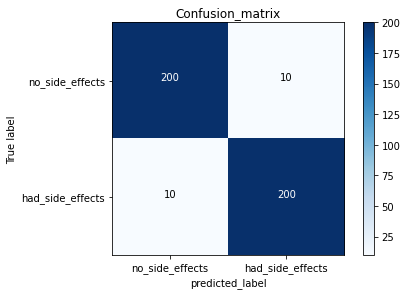

In [3]:
import numpy as np
from sklearn.utils import shuffle
from random import randint
from sklearn.preprocessing import MinMaxScaler
train_labels = []
train_samples=[]
# 5% of young allergy
for i in range(50):
    train_younger = randint(13, 64)
    train_samples.append(train_younger)
    train_labels.append(1)
# 5% of old not allergy
    train_older = randint(65, 100)
    train_samples.append(train_older)
    train_labels.append(0)

# 95% of young no allergy
for i in range(1000):
    train_younger = randint(13, 64)
    train_samples.append(train_younger)
    train_labels.append(0)
# 95% old shwing allergy
    train_older = randint(65, 100)
    train_samples.append(train_older)
    train_labels.append(1)
train_samples=np.array(train_samples)
train_labels=np.array(train_labels)
train_samples, train_labels = shuffle(train_samples,train_labels)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))
#for i in scaled_train_samples:
#    print(i)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy

model = Sequential([
    Dense(units=16,input_shape=(1,),activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(2,activation='softmax')
])
model.compile(optimizer=Adam(lr=0.001), loss=sparse_categorical_crossentropy,metrics=['accuracy'])
#model.summary()
model.fit(x=scaled_train_samples,y=train_labels,validation_split=0.1,batch_size=10,epochs=30,shuffle=True,verbose=2)

test_samples=[]
test_labels=[]

for i in range(10):
    test_younger=randint(13,64)
    test_samples.append(test_younger)
    test_labels.append(1)
    test_older=randint(65,100)
    test_samples.append(test_older)
    test_labels.append(0)

for i in range(200):
    test_younger=randint(13,64)
    test_samples.append(test_younger)
    test_labels.append(0)
    test_older=randint(65,100)
    test_samples.append(test_older)
    test_labels.append(1)

test_samples=np.array(test_samples)
test_labels=np.array(test_labels)
test_labels,test_samples=shuffle(test_labels,test_samples)
scaler_test_samples= scaler.fit_transform(test_samples.reshape(-1,1))
prediction=model.predict(x=scaler_test_samples,batch_size=10,verbose=0)
#for i in prediction:
   # print(i)
rounded_prediction=np.argmax(prediction,axis=-1)
for i in rounded_prediction:
    print(i)
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

cm=confusion_matrix(y_true=test_labels,y_pred=rounded_prediction)

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('confusion matrix, without normalization')
    print(cm)
    thresh=cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment='center',
                 color='white' if cm[i,j]> thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted_label')
cm_plot_labels=['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion_matrix')

In [8]:
import os

In [11]:
if os.path.isfile('/model_save.h5') is False:
  model.save('/model_save.h5')

In [13]:
from tensorflow.keras.models import load_model
new_model=load_model('/model_save.h5')

In [15]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_7 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [24]:
if os.path.isfile('/only_architecture.h5')  is False:
  json_string=model.to_json()

In [22]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "Dense", "config": {"name": "dense_6", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_7", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "

In [27]:
from tensorflow.keras.models import model_from_json
model_architecture=model_from_json(json_string)

In [28]:
model_architecture.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_7 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [35]:
if os.path.isfile('only_weights') is False:
  weights=model.save_weights('/only_weights.h5')

In [36]:
model2=Sequential([
                  Dense(units=16,input_shape=(1,),activation='relu'),
                  Dense(32,activation='relu'),
                  Dense(2,activation='softmax')
])

In [37]:
model2.load_weights('/only_weights.h5')